# B''H

## House Prices - EDA

**Step 6: Analyze the numerical variables in consideration for feature selection.**

**Key Takeaway:** 

- We selected the following few fields to further research:
    - **`OverallQual`**: Rates the overall material and finish of the house
    - **`GrLivArea`**: Above grade (ground) living area square feet
    - **`ExterQualRecode`**: The quality of the material on the exterior
    - **`KitchenQualRecode`**: Kitchen quality
    - **`GarageCars`**: Size of garage in car capacity
    - **`TotalBsmtSF`**: Total square feet of basement area


- These fields have a clear impact on the **`SalesPrice`**

In [1]:
import os
import sys

import math

import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

---
## Set the plot output sizes

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


---
## Get project info

In [4]:
NOTEBOOKS_DIR = os.path.join(os.pardir)

print(os.path.abspath(NOTEBOOKS_DIR))

/home/laz/repos/springboard-mini-projects/notebooks


In [5]:
PROJ_ROOT = os.path.join(NOTEBOOKS_DIR,os.pardir)

print(os.path.abspath(PROJ_ROOT))

/home/laz/repos/springboard-mini-projects


In [6]:
# add the 'src' directory as one where we can import modules
SRC_DIR = os.path.join(PROJ_ROOT, 'src')
sys.path.append(SRC_DIR)

print(os.path.abspath(SRC_DIR))

/home/laz/repos/springboard-mini-projects/src


In [7]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf

---
### Import the data:

In [10]:
df_train = hf.read_csv(
    p_dir       = hf.DATA_INTERIM_DIR,
    p_file_name = 'df_train_step_04.csv',
    p_index_col = 'Id'
)

df_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQualRecode,ExterCondRecode,HeatingQCRecode,KitchenQualRecode
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,2,2008,WD,Normal,208500,4,3,5,4
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,5,2007,WD,Normal,181500,3,3,5,3
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,9,2008,WD,Normal,223500,4,3,5,4
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,2,2006,WD,Abnorml,140000,3,3,4,4
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,12,2008,WD,Normal,250000,4,3,5,4


---
### Plot the correlation heatmap matrix 

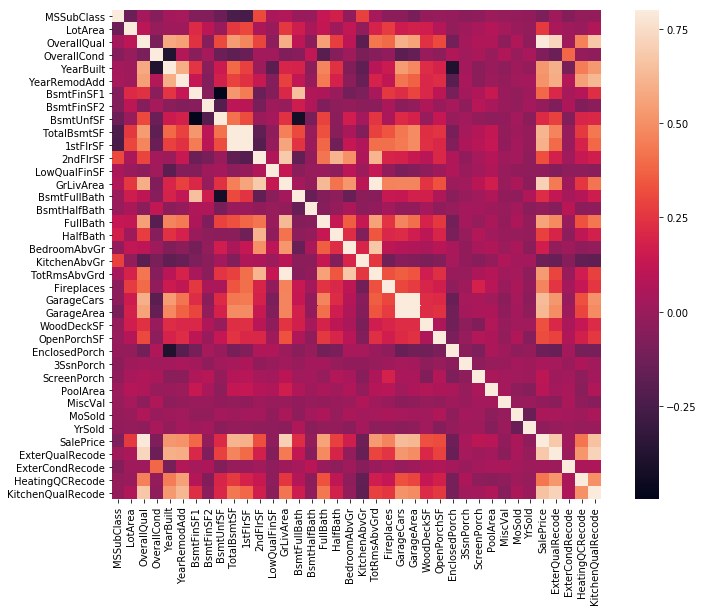

In [12]:
corrmat = df_train.corr()

sns.heatmap(corrmat, vmax=.8, square=True)

---
### Lets zoom in on TotalBsmtSF

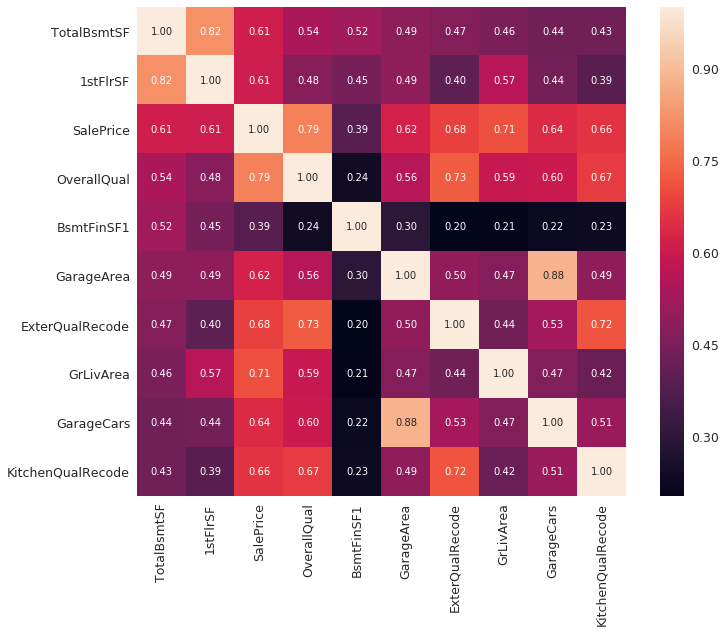

In [14]:
k = 10 #number of variables for heatmap

cols = corrmat.nlargest(k, 'TotalBsmtSF')['TotalBsmtSF'].index

cm = np.corrcoef(df_train[cols].values.T)

sns.set(font_scale=1.25)

hm = sns.heatmap(
    cm, 
    cbar        = True, 
    annot       = True, 
    square      = True, 
    fmt         = '.2f', 
    annot_kws   = {'size': 10}, 
    yticklabels = cols.values, 
    xticklabels = cols.values
)

plt.show()

### Things to note:
- The correlation between 'TotalBsmtSF' and '1stFlrSF' variables, is very significant. 
- Actually, this correlation is so strong that it can indicate a situation of multicollinearity. 
- If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. 

---
### Lets zoom in on SalePrice

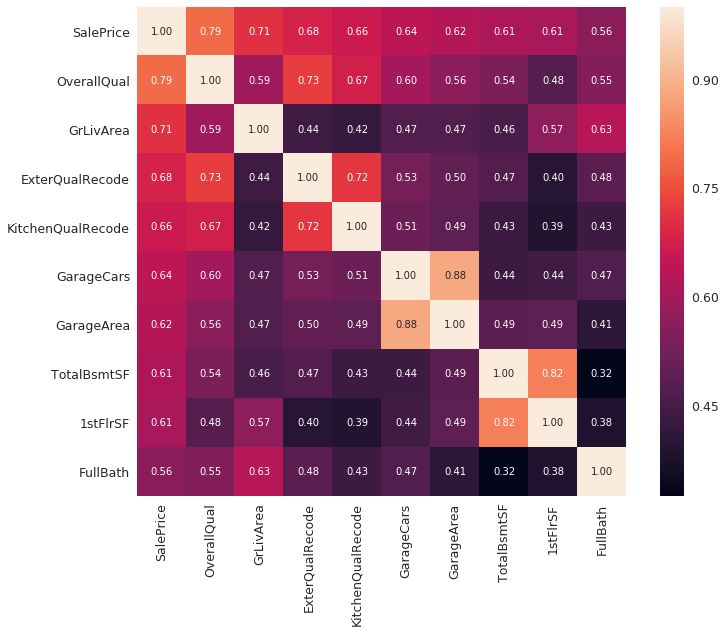

In [16]:
k = 10 #number of variables for heatmap

cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(df_train[cols].values.T)

sns.set(font_scale=1.25)

hm = sns.heatmap(
    cm, 
    cbar        = True, 
    annot       = True, 
    square      = True, 
    fmt         = '.2f', 
    annot_kws   = {'size': 10}, 
    yticklabels = cols.values, 
    xticklabels = cols.values
)

plt.show()

### Things to note:

- **`OverallQual`** and **`GrLivArea`** are the most strongly correlated with **`SalePrice`**.

- The property exterior quality and kitchen quality are very strongly correlated with **`SalePrice`**.

- **`GarageCars`** and **`GarageArea`** are also strongly correlated variables. 
  
  However, the number of cars that fit into the garage is a consequence of the garage area. 
  
  Therefore, we just need one of these variables in our analysis. 
  
  We'll keep **`GarageCars`** since its correlation with **`SalePrice`** is higher.

- **`TotalBsmtSF`** and **`1stFloor`** also seem to be twins. 
  
  We'll keep **`TotalBsmtSF`**.

---
### Let's run some scatter plots between 'SalePrice' and the above selected correlated variables

In [17]:
fields = ['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQualRecode', 'KitchenQualRecode', 'GarageCars', 'TotalBsmtSF']

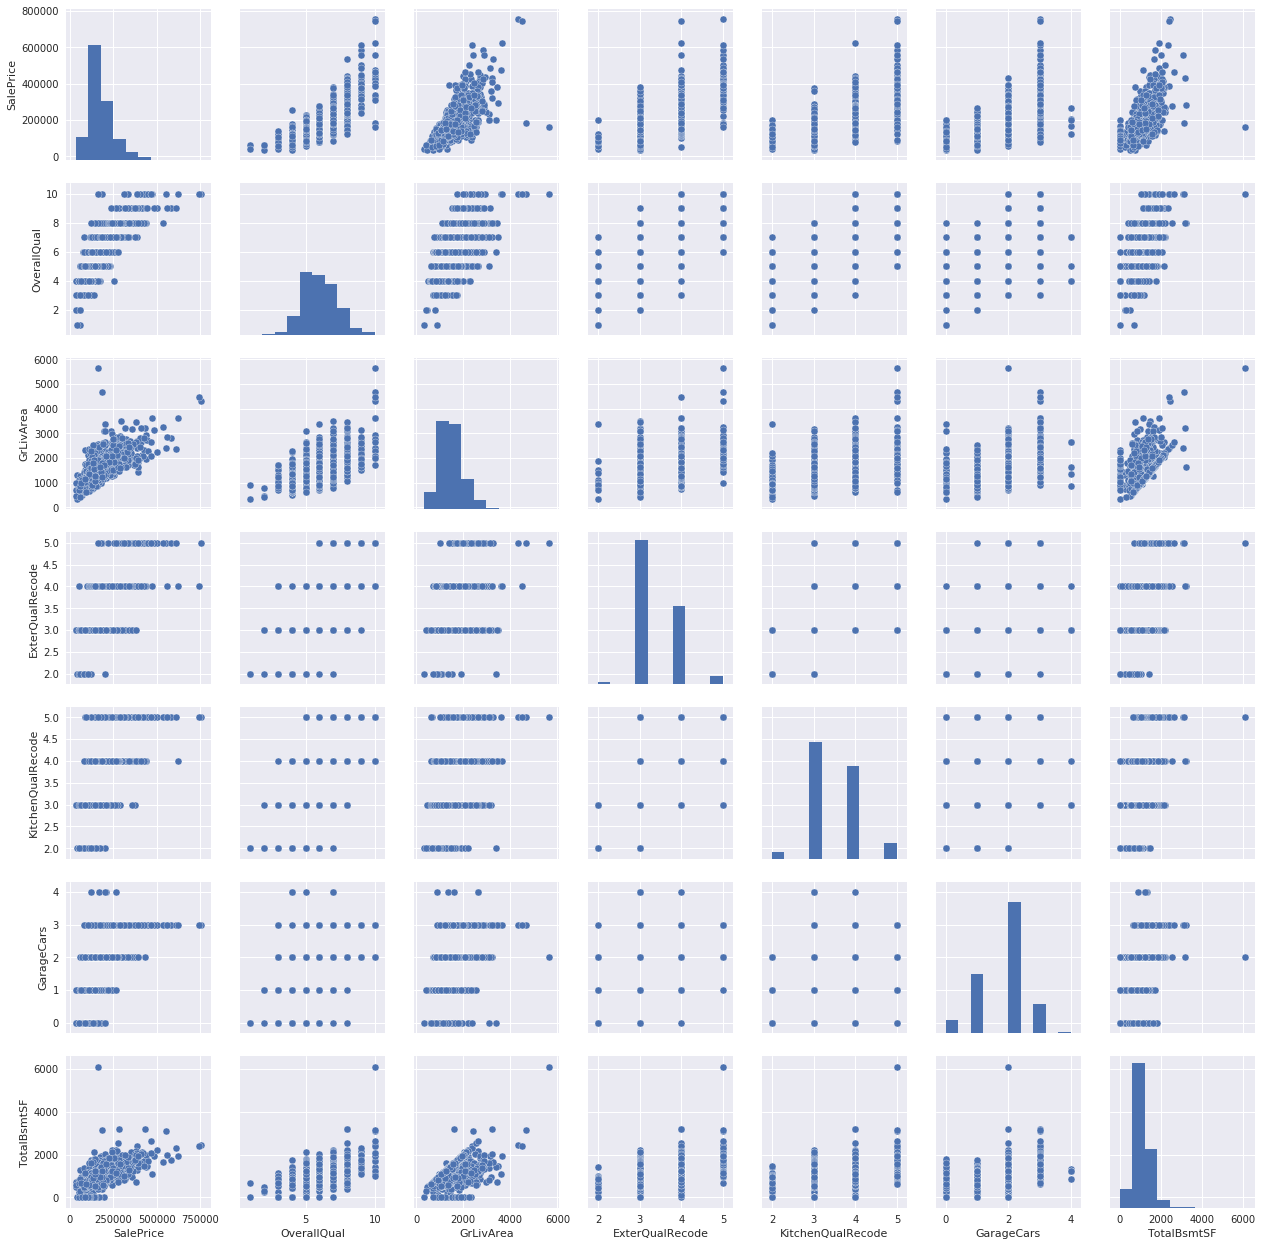

In [18]:
sns.set()

sns.pairplot(df_train[fields], size = 2.5)

plt.show();

#### This plot brings to light the observations made above. 

#### For example, look accross the top row where SalePrice is on the y-axis and see
- the strong linear relationship with GrLivArea
- the strong linear relationship with TotalBsmtSF
- The clear progression of OverallQual's impact on the SalePrice as the rating improves


---

#### Again, there are quite a few variables that we should do further research into to see how it can be used to predict the SalesPrice.

#### However, at the moment, we'll select the following few fields to further research:
- **`OverallQual`**: Rates the overall material and finish of the house
- **`GrLivArea`**: Above grade (ground) living area square feet
- **`ExterQualRecode`**: The quality of the material on the exterior
- **`KitchenQualRecode`**: Kitchen quality
- **`GarageCars`**: Size of garage in car capacity
- **`TotalBsmtSF`**: Total square feet of basement area

These fields have a clear impact on the **`SalesPrice`**